# Normalization

Although the terms standardization and normalization are often used interchangeably, the process of normalization can include both standardizing and scaling data. 

## What is Standarization? 
![normal dist](https://www.mathplanet.com/Oldsite/media/27934/normal_distribution_500x263.jpg)
A standard, normal distribution has a μ (mean) of 0 and a σ (standard deviation) of 1. Standardization, rescales the features of a dataset so that the overall distribution has mean of roughly 0 and a standard deviation of roughly 1. 

### When should we standardize a distribution? 
There isn't a hard fast rule to answer this question, but there are some general guidelines on when it is best to normalize your dataset. Generally speaking, data that has a roughly Gaussian distribution and measures a relationship between features that have different dimensions should be normalized to minimize the effect of the scale difference on the size of the coefficients. 

For example, the following datasets would be good candidates for normalization: 
- Comparing the efffect of a drug on two gene regions, one that is 1000 base pairs in length, the other that is 150 base pairs in length
- Comparing the effects of age and income, where one variable ranges from 0 to 100 and the other 0 to 1,000,000 and beyond

Normalization is not required for every dataset, but is useful when: 
- You do not know the distribution of your data
- You know your data is not a Gaussian distribution
- Your data has varying scales
- Your algorithm assumes normality
- Your model is centered around the mean and requires standard variance (PCA)

### When should we NOT standardize? 
Most importantly, if the exact scale between features matters, you do not want to standardize your dataset. For example, if you're measuring the gender difference between clicks from a website ad, the difference in clicks is going to be different for each gender and you would throw all that information away by scaling. 

Additionally, algorithms that are not distance based, such as Linear Discriminant Analysis (LDA) and tree based methods, are not affected by feature scaling. 

Let's take a look at this in action: 


In [80]:
# create a single column dataframe 
import pandas as pd
import numpy as np
# Set charts to view inline
%matplotlib inline
 
# Create a DataFrame
df = pd.DataFrame({'Score1':[62,-47,-55,74,31,77,85,63,42,67,89,81,56],
                  'Score2':[1062,-1047,-12555,20074,40031,1077,1185,163,4222,3467,8889,10081,5656]},
                  columns=['Score1', 'Score2'])
df

,Score1,Score2
0,62,1062
1,-47,-1047
2,-55,-12555
3,74,20074
4,31,40031
5,77,1077
6,85,1185
7,63,163
8,42,4222
9,67,3467


We can easily see that our scores are on very different ranges: 

In [81]:
df.describe()

,Score1,Score2
count,13.000000,13.000000
mean,48.076923,6331.153846
std,46.958247,12547.510416
min,-55.000000,-12555.000000
25%,42.000000,1062.000000
50%,63.000000,3467.000000
75%,77.000000,8889.000000
max,89.000000,40031.000000


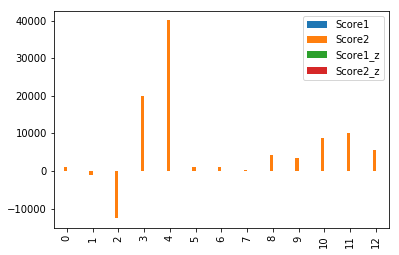

In [90]:
df.plot(kind='bar')

Our scores are on such different ranges, that the Score2 column completetly drowns out information from Score1. Let's look at the distribution of each score individually: 

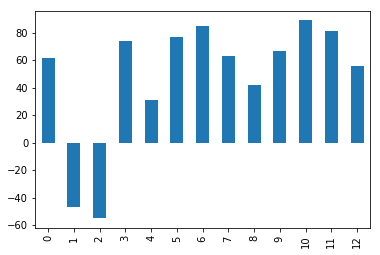

In [82]:
df.Score1.plot(kind='bar')

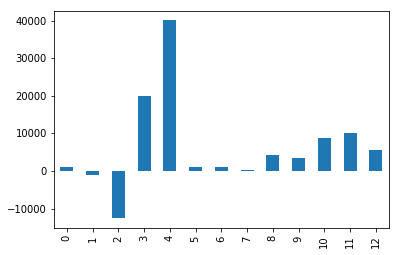

In [83]:
df.Score2.plot(kind='bar')

Even though the scores are on different scales, their distribution is similar. 

## Standardization
The standard method of scaling features is to center the mean around 0 and the standard deviation around 1 using the following formula: 
    ![zscore](./zscore.png)
    
This method works best on dataset that is roughly normal, but on differing scales. 

#### Manual Rescaling
Here we are taking each data point and finding the difference between the point and the feature's mean, then dividing by the feature's standard deviation. I emphasize the word "feature" here because this works on a feature level. 

We can easily create a function to do this manually to visualize how the normaliztion works. Then we will learn to use the scalers in sci-kit learn to easily apply different normalization methods to a dataset: 

In [84]:
def zscore_norm(x, mean, std_dev):
    z = (x - mean)/std_dev
    return z

Now we need to find the mean and standard deviation for each column (normalization must be applied seperatly to each feature, not the entire dataframe): 

In [85]:
# score 1
score1_mean = df.Score1.mean()
score1_stdDev = df.Score1.std()

# score 2
score2_mean = df.Score2.mean()
score2_stdDev = df.Score2.std()

And now we can apply our zscore_norm() function to transform each column: 

In [86]:
df["Score1_z"] = zscore_norm(df.Score1, score1_mean, score1_stdDev)

In [87]:
df["Score2_z"] = zscore_norm(df.Score2, score2_mean, score2_stdDev)

Let's calculate the first row by hand as a check: 

In [92]:
(62 - score1_mean)/score1_stdDev

0.29649908021034427

In [95]:
(1062 - score2_mean)/score2_stdDev

-0.41993620020522054

And now lets take a look at our first score to make sure it's correct: 

In [93]:
df.head(1)

,Score1,Score2,Score1_z,Score2_z
0,62,1062,0.296499,-0.419936


Our formula works as expected. 

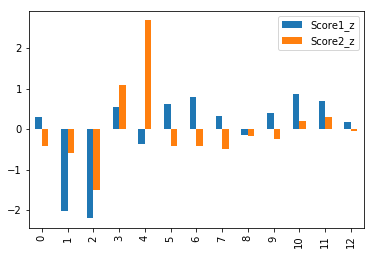

In [89]:
df[["Score1_z", "Score2_z"]].plot(kind='bar')

And now we can clearly see that recentering the scores around the mean allows us to draw a better comparison between the two scores while retaining the distribution of each feature. 

## Scikit-Learn
Scikit-learn is a popular package for data science and machine learning models, and contains a preprocessing package that allows us to easily normalize and scale data. Now that we know how the normalization process works, let's look at how to implement it in scikit-learn.

In [97]:
from sklearn import preprocessing  #import the preprocessing package we need to normalize and scale

df # remind ourselves what our dataframe looks like

,Score1,Score2,Score1_z,Score2_z
0,62,1062,0.296499,-0.419936
1,-47,-1047,-2.024712,-0.588017
2,-55,-12555,-2.195076,-1.505171
3,74,20074,0.552045,1.095265
4,31,40031,-0.363662,2.685779
5,77,1077,0.615932,-0.418741
6,85,1185,0.786296,-0.410133
7,63,163,0.317795,-0.491584
8,42,4222,-0.129411,-0.168093
9,67,3467,0.402977,-0.228265


#### 1. Cast our columns to floats
sklearn expects our preprocessing input to be floats, so we'll start by casting our score columns to floats: 

In [99]:
df["Score1"] = df.Score1.astype(float)
df["Score2"] = df.Score2.astype(float)

In [100]:
df.head()

,Score1,Score2,Score1_z,Score2_z
0,62.0,1062.0,0.296499,-0.419936
1,-47.0,-1047.0,-2.024712,-0.588017
2,-55.0,-12555.0,-2.195076,-1.505171
3,74.0,20074.0,0.552045,1.095265
4,31.0,40031.0,-0.363662,2.685779


#### 2. Create a scaling transformer
Scikit learn pipelines always start by creating either a transform or model object that we apply to our dataset: 

In [118]:
# Create a minimum and maximum processor object
standard_scaler = preprocessing.StandardScaler()

#### 3. Apply the transform to the columns
Now that we've created the transforming object, we can fit the object to our dataset and transform to the columns we want to transform: 

In [120]:
 df[["Score1", "Score2"]] = standard_scaler.fit_transform(df[["Score1", "Score2"]])

In [121]:
df

,Score1,Score2,Score1_z,Score2_z
0,0.308606,-0.437083,0.296499,-0.419936
1,-2.107387,-0.612028,-2.024712,-0.588017
2,-2.284708,-1.566632,-2.195076,-1.505171
3,0.574587,1.139988,0.552045,1.095265
4,-0.378511,2.795448,-0.363662,2.685779
5,0.641082,-0.435839,0.615932,-0.418741
6,0.818403,-0.426880,0.786296,-0.410133
7,0.330771,-0.511657,0.317795,-0.491584
8,-0.134695,-0.174957,-0.129411,-0.168093
9,0.419431,-0.237585,0.402977,-0.228265


The standard scaler from sklearn uses a slightly different formula than our manual method, but you can see that the results are very similar. 

## Scaling

### Min-Max Scaling
Min-Max scaling scales the data points to a fixed range, usually between 0 and 1. For each data point, min-max scaler subtracts the minimum value for a feature from the data point, and then divides by the range. This process preserves the original shape of the distribution without reducing the importance of outliers. 
                                    ![min_max](./min_max.png)

#### When to use Min-Max
This method works great for algorithms that require certain bounded input, such as in image processing where images are coded in RGB color with pixel intensitie values between 0 and 100. Many neural networks require data to be input on a scale between 0 and 1. 

This is also a good method to try if your data is not normally distributed. 

The downside of this method is that it decreases our standard deviation and the importance of outliers. So it's a good method to use if we want to minimize the effect of outliers. 

Let's rebuild our original dataframe to try this method out: 

In [133]:
# Create a DataFrame
df2 = pd.DataFrame({'Score1':[62,-47,-55,74,31,77,85,63,42,67,89,81,56],
                  'Score2':[1062,-1047,-12555,20074,40031,1077,1185,163,4222,3467,8889,10081,5656]},
                  columns=['Score1', 'Score2'])
df2

,Score1,Score2
0,62,1062
1,-47,-1047
2,-55,-12555
3,74,20074
4,31,40031
5,77,1077
6,85,1185
7,63,163
8,42,4222
9,67,3467


In [113]:
df2.describe()

,Score1,Score2
count,13.000000,13.000000
mean,48.076923,6331.153846
std,46.958247,12547.510416
min,-55.000000,-12555.000000
25%,42.000000,1062.000000
50%,63.000000,3467.000000
75%,77.000000,8889.000000
max,89.000000,40031.000000


Our range is all over the place for this dataset. Let's plot our distribution: 

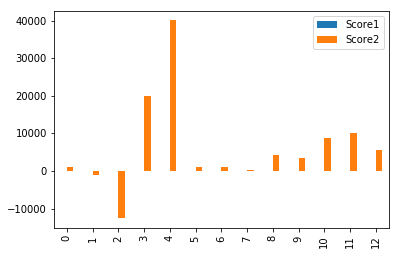

In [114]:
df2.plot(kind='bar')

In [134]:
# step1: cast our values to floats
df2["Score1"] = df2[['Score1']].values.astype(float)
df2["Score2"] = df2[['Score2']].values.astype(float)

In [137]:
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
scaled_df = min_max_scaler.fit_transform(df2)
names = df2.columns
df3 = pd.DataFrame(scaled_df, columns=names)

In [144]:
pd.concat([df2.describe(), df3.describe()], 
          axis=1)

,Score1,Score2,Score1,Score2
count,13.000000,13.000000,13.000000,13.000000
mean,48.076923,6331.153846,0.715812,0.359148
std,46.958247,12547.510416,0.326099,0.238609
min,-55.000000,-12555.000000,0.000000,0.000000
25%,42.000000,1062.000000,0.673611,0.258947
50%,63.000000,3467.000000,0.819444,0.304682
75%,77.000000,8889.000000,0.916667,0.407789
max,89.000000,40031.000000,1.000000,1.000000


All of our values have now been scaled between the range of 0 and 1. 

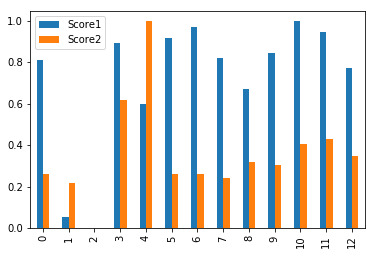

In [145]:
df3.plot(kind='bar')

And once again, we can more easily examine any potential relationship between Score1 and Score2. 

## Further Reading
There are many more methods of standardizing and scaling your dataset than we have time to discuss here, but please see this article for more information on the standard options available with scikit learn: 

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py